## Project 2

### In this project you will apply your data wrangling and exploratory data analysis skills to baseball data. In particular, we want to know how well did Moneyball work for the Oakland A's. Was it worthy of a movie?

## The Data

You will be using data from a very useful database on baseball teams, players and seasons curated by Sean Lahman available at http://www.seanlahman.com/baseball-archive/statistics/. The database has been made available as a sqlite database https://github.com/jknecht/baseball-archive-sqlite. sqlite is a light-weight, file-based database management system that is well suited for small projects and prototypes.

You can read more about the dataset here: http://seanlahman.com/files/database/readme2014.txt.

You can download the sqlite file directly from github at https://github.com/jknecht/baseball-archive-sqlite/raw/master/lahman2014.sqlite.

You will be accessing the sqlite database in python using the sqlite package. This package provides a straightforward interface to extract data from sqlite databases using standard SQL commands.

Once you establish a connection with the sqlite database, you can store query results directly in a pandas dataframe using the read_sql function.

## The Question

We want to understand how efficient teams have been historically at spending money and getting wins in return. In the case of Moneyball, one would expect that Oakland was not much more efficient than other teams in their spending before 2000, were much more efficient (they made a movie about it after all) between 2000 and 2005, and by then other teams may have caught up. Your job in this project is to see how this is reflected in the data we have.

## Part 1: Wrangling

The data you need to answer these questions is in the Salaries and Teams tables of the database.


### Problem 1

Using SQL compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). You should include other columns that will help when performing EDA later on (e.g., franchise ids, number of wins, number of games).

### Here I used Salaried Table and read "yearID", "teamID" and sum of "salary" by grouping by yearID and teamID. Also I show the unique values of these columns and there is no None values in them.

In [4]:
import sqlite3
import pandas as pd
import os

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_team_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries GROUP BY yearID, teamID"
team_year_salaries = pd.read_sql(salary_team_query, conn)
team_year_salaries.to_csv('salaries.csv') 

print('yearID:',team_year_salaries.yearID.unique())
print('teamID:',team_year_salaries.teamID.unique())
Sorted_total_payroll=sorted(team_year_salaries.total_payroll.unique())
print('min and max of total_payroll:',Sorted_total_payroll[0],Sorted_total_payroll[-1])

team_year_salaries.head()


yearID: [1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]
teamID: ['ATL' 'BAL' 'BOS' 'CAL' 'CHA' 'CHN' 'CIN' 'CLE' 'DET' 'HOU' 'KCA' 'LAN'
 'MIN' 'ML4' 'MON' 'NYA' 'NYN' 'OAK' 'PHI' 'PIT' 'SDN' 'SEA' 'SFN' 'SLN'
 'TEX' 'TOR' 'COL' 'FLO' 'ANA' 'ARI' 'MIL' 'TBA' 'LAA' 'WAS' 'MIA' 'NYM'
 'SFG']
min and max of total_payroll: 880000.0 231978886.0


,yearID,teamID,total_payroll
0,1985,ATL,14807000.0
1,1985,BAL,11560712.0
2,1985,BOS,10897560.0
3,1985,CAL,14427894.0
4,1985,CHA,9846178.0


### Here I used Teams Table and select "yearID", "teamID", "franchID", "Rank", "G", "GHome"," W", "L" and  (W*100.0/G) as Winning_Percentage by grouping by yearID and teamID. Also I show the unique values of these columns and there is only None values in Ghome. Then I looked at unique values at Ghome after 1985 and there is no None values.

In [11]:
win_team_query = "SELECT yearID, teamID, franchID, Rank, G, GHome, W, L, (W*100.0/G) as Winning_Percentage FROM Teams GROUP BY yearID, teamID"
team_year_win = pd.read_sql(win_team_query, conn)
team_year_win.to_csv('win.csv') 
print('yearID:',team_year_win.yearID.unique())
print('teamID:',team_year_win.teamID.unique())
print('franchID:',team_year_win.franchID.unique())
print('Rank:',team_year_win.Rank.unique())
print('G:',team_year_win.G.unique())
print('Ghome:',team_year_win.Ghome.unique())
print('Ghome after 1985:',team_year_win.Ghome[team_year_win.yearID >= 1985].unique() )

print('W:',team_year_win.W.unique())
print('L:',team_year_win.L.unique())

Sorted_winning_percentage=sorted(team_year_win.Winning_Percentage.unique())
print('min and max of winning Percentage:',Sorted_winning_percentage[0],Sorted_winning_percentage[-1])
team_year_win.head()

yearID: [1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885
 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900
 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915
 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945
 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014]
teamID: ['BS1' 'CH1' 'CL1' 'FW1' 'NY2' 'PH1' 'RC1' 'TRO' 'WS3' 'BL1' 'BR1' 'BR2'
 'MID' 'WS4' 'BL4' 'ELI' 'PH2' 'WS5' 'CH2' 'HR1' 'KEO' 'NH1' 'PH3' 'SL1'
 'SL2' 'WS6' 'BSN' 'CHN' 'CN1' 'HAR' 'LS1' 'NY3' 'PHN' 'SL3' 'IN1' 'ML2'
 'PRO' 'BFN' 'CL2' 'SR1' 'TRN' 'WO

,yearID,teamID,franchID,Rank,G,Ghome,W,L,Winning_Percentage
0,1871,BS1,BNA,3,31,NaN,20,10,64.516129
1,1871,CH1,CNA,2,28,NaN,19,9,67.857143
2,1871,CL1,CFC,8,29,NaN,10,19,34.482759
3,1871,FW1,KEK,7,19,NaN,7,12,36.842105
4,1871,NY2,NNA,5,33,NaN,16,17,48.484848


### Here I merge two data frames on yearID and teamID and I use inner join and this way the years before 1985 are eliminated and there will be no None values in the data frame.

In [12]:
team_year_win_salary=pd.merge(team_year_win, team_year_salaries, on=['yearID' , 'teamID'] , how='inner')
team_year_win_salary.to_csv('win_salary.csv') 
team_year_win_salary.head()

,yearID,teamID,franchID,Rank,G,Ghome,W,L,Winning_Percentage,total_payroll
0,1985,ATL,ATL,5,162,81.0,66,96,40.740741,14807000.0
1,1985,BAL,BAL,4,161,81.0,83,78,51.552795,11560712.0
2,1985,BOS,BOS,5,163,81.0,81,81,49.693252,10897560.0
3,1985,CAL,ANA,2,162,79.0,90,72,55.555556,14427894.0
4,1985,CHA,CHW,3,163,81.0,85,77,52.147239,9846178.0


## Part 2: Exploratory Data Analysis

### Payroll Distribution

## Problem 2

### Write code to produce plots that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014).

### Here first I looked at the data from 1990 to 2015 grouping by teamID. Then I plot the total payroll over time for each team but the graph is so messy. I should come up with another way to show the graph. However from this graph we can see that by increasing the year the average and standard deviation of total payroll for the teams increases.

In [13]:
df_payroll_teams_dist = team_year_win_salary[(team_year_win_salary['yearID']>1989) & (team_year_win_salary['yearID']<2015)].groupby('teamID')

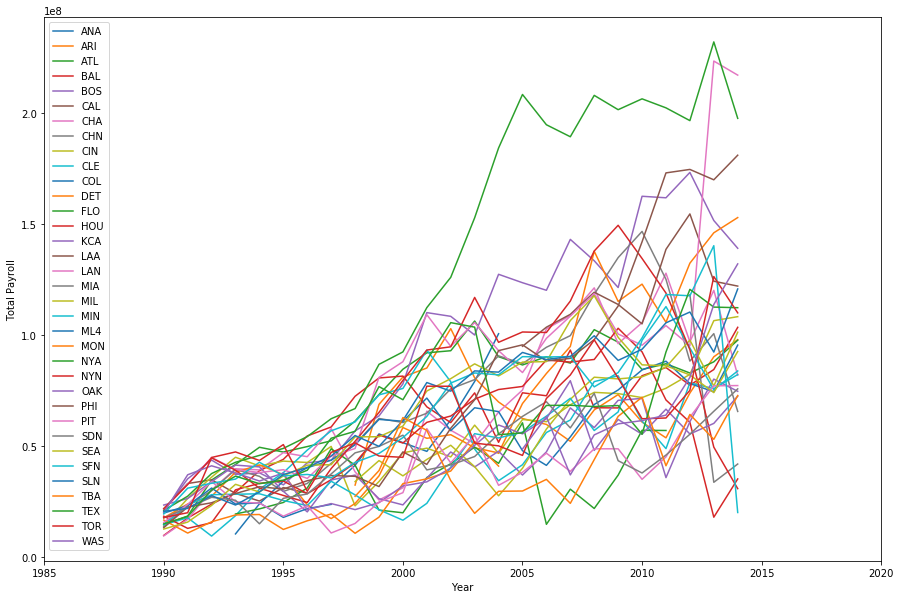

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,10))
for title, group in df_payroll_teams_dist:
    group.plot(x='yearID', y='total_payroll', ax=ax, label=title)

plt.legend(loc=2, prop={'size': 10})
plt.xlabel('Year')
plt.ylabel('Total Payroll')
plt.xlim(1985,2020)
plt.show()

### Here I show the distribution conditional on time with another graph which is better shown.


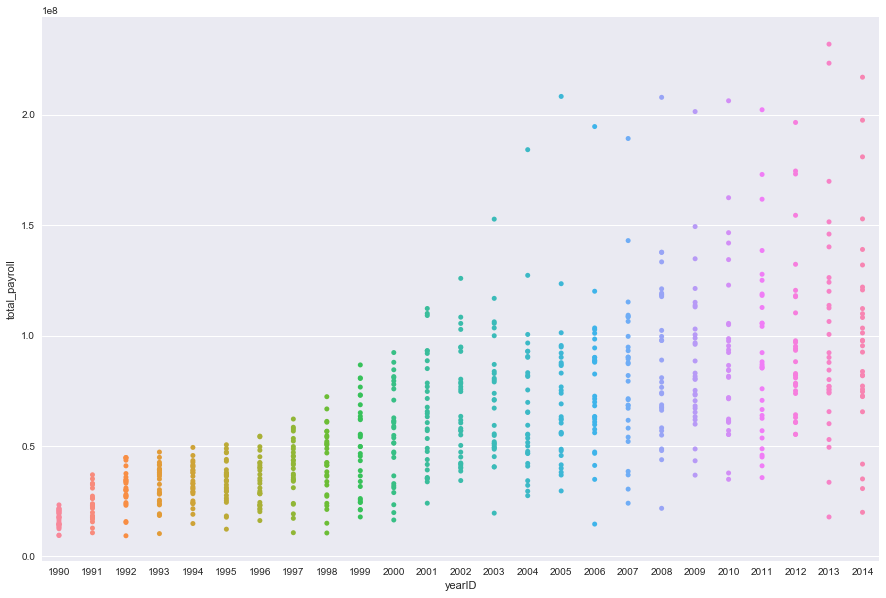

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
df_1990_2014 = team_year_win_salary[(team_year_win_salary['yearID']>1989) & (team_year_win_salary['yearID']<2015)]
sns.stripplot(x=df_1990_2014.yearID , y=df_1990_2014.total_payroll);

## Question 1

What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you can make statements in terms of central tendency, spread, etc.

### From the above graphs we can see that the average and standard deviation of payrolls is increasinng over time.      



## Problem 3

Write code to produce plots that specifically show at least one of the statements you made in Question 1. 

### Here I show two plots. The first one shows the average and standard deviation of payrolls over time. The second plot shows the average and the standard deviation is shown around the average line. Both confirming my declaration in quetion 1.

In [17]:
average_payroll_over_time=team_year_win_salary.groupby('yearID')['total_payroll'].mean()
sd_payroll_over_time=team_year_win_salary.groupby('yearID')['total_payroll'].std()


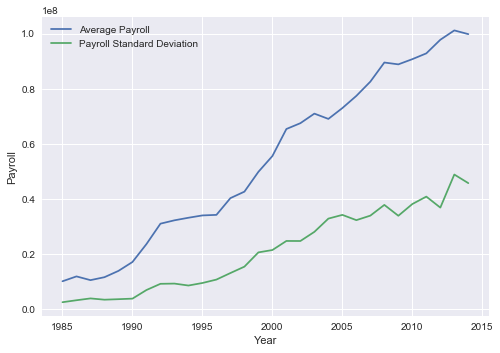

In [18]:
plt.plot(average_payroll_over_time, label='Average Payroll')
plt.plot(sd_payroll_over_time, label='Payroll Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Payroll')


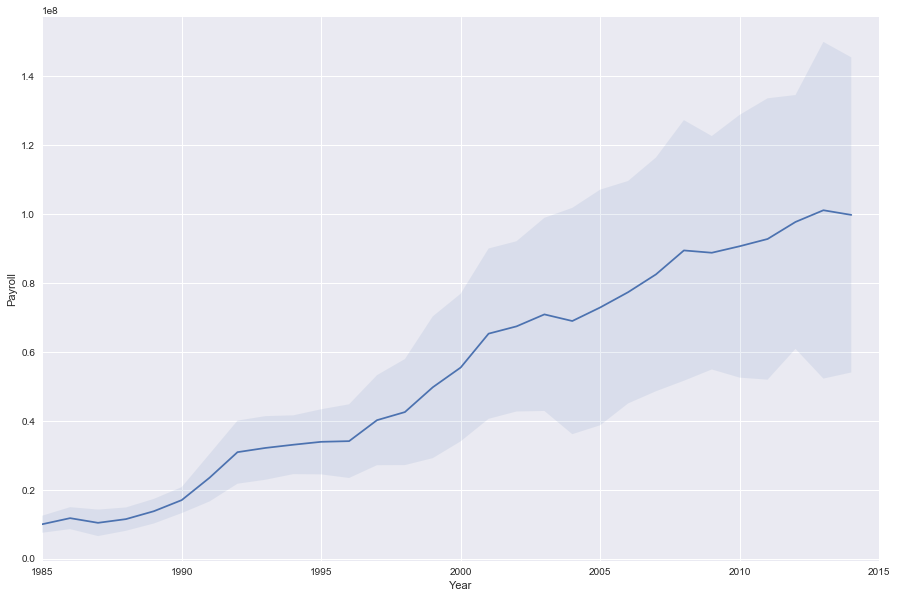

In [20]:
plt.figure(figsize=(15, 10))

ax = average_payroll_over_time.plot()
ax.fill_between(average_payroll_over_time.index, average_payroll_over_time - sd_payroll_over_time, average_payroll_over_time + sd_payroll_over_time,
                alpha=.1)
plt.xlabel("Year")
plt.xlim(1985,2015)
plt.ylabel("Payroll")
sns.despine()

## Correlation between payroll and winning percentage

## Problem 4

Write code to discretize year into five time periods and then make a scatterplot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods. You could add a regression line (using, e.g., NumPy's polyfit) in each scatter plot to ease interpretation.

### Here I just choose the years between 1990 and 2014 and then cut the period in 6. Then you can see the winning percentage versus mean payroll for each category. I show the regression line for Oakland A's and we can see how that specific team is performing over time.

In [33]:
df_1990_2014 = team_year_win_salary[(team_year_win_salary['yearID']>1989) & (team_year_win_salary['yearID']<2015)]
df_1990_2014['categories']=pd.cut(df_1990_2014['yearID'],[1984, 1990, 1994, 1999, 2005, 2010,2014])
df_1990_2014_category=df_1990_2014.groupby('categories')
df_1990_2014.head()

C:\Users\Elham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,yearID,teamID,franchID,Rank,G,Ghome,W,L,Winning_Percentage,total_payroll,categories
130,1990,ATL,ATL,6,162,81.0,65,97,40.123457,14555501.0,"(1984, 1990]"
131,1990,BAL,BAL,5,161,80.0,76,85,47.204969,9680084.0,"(1984, 1990]"
132,1990,BOS,BOS,1,162,81.0,88,74,54.320988,20558333.0,"(1984, 1990]"
133,1990,CAL,ANA,4,162,81.0,80,82,49.382716,21720000.0,"(1984, 1990]"
134,1990,CHA,CHW,2,162,80.0,94,68,58.024691,9491500.0,"(1984, 1990]"


C:\Users\Elham\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


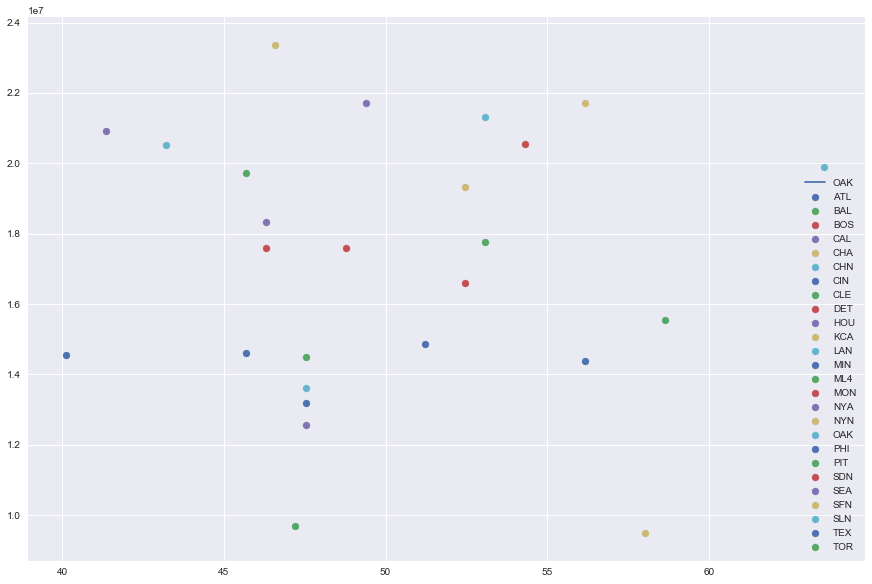

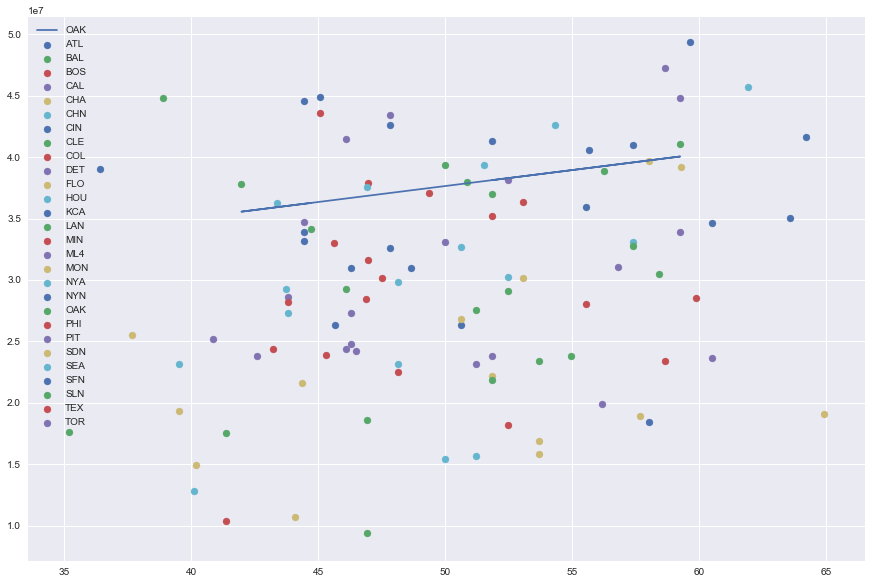

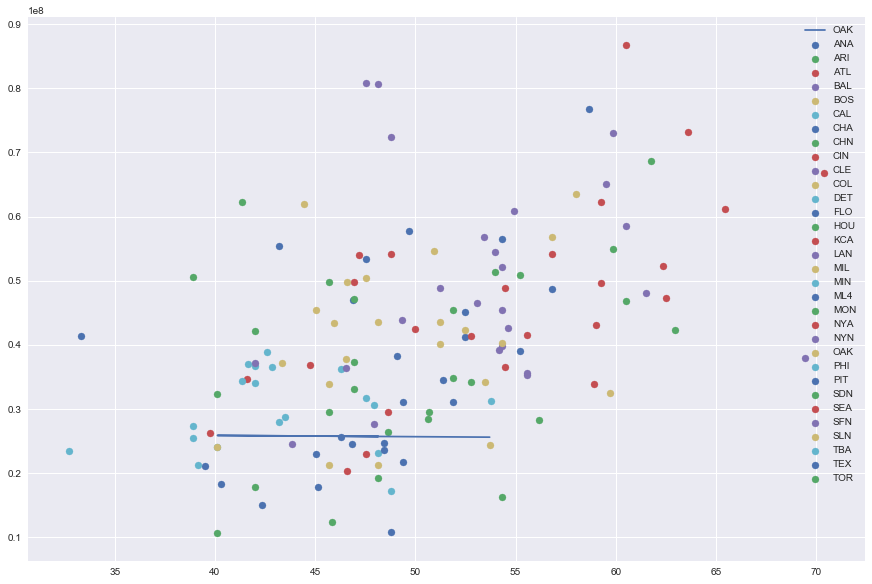

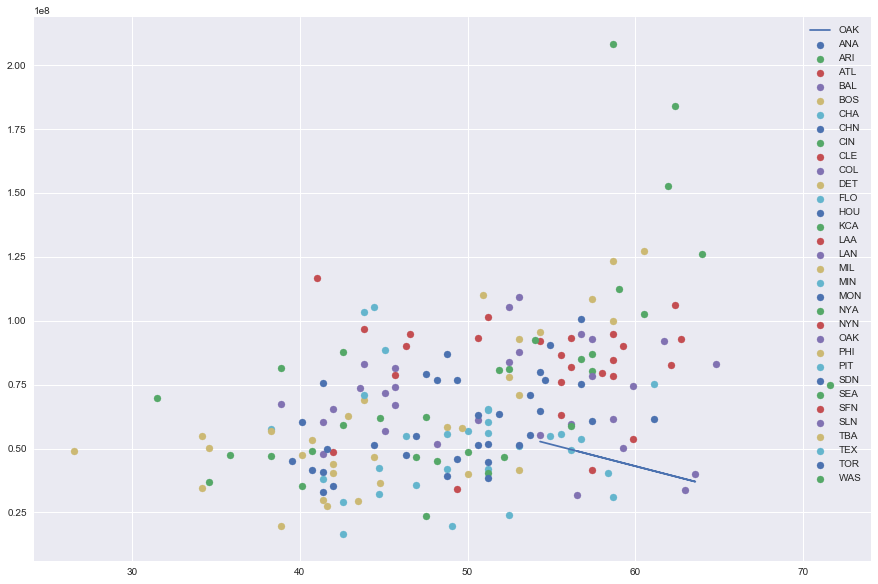

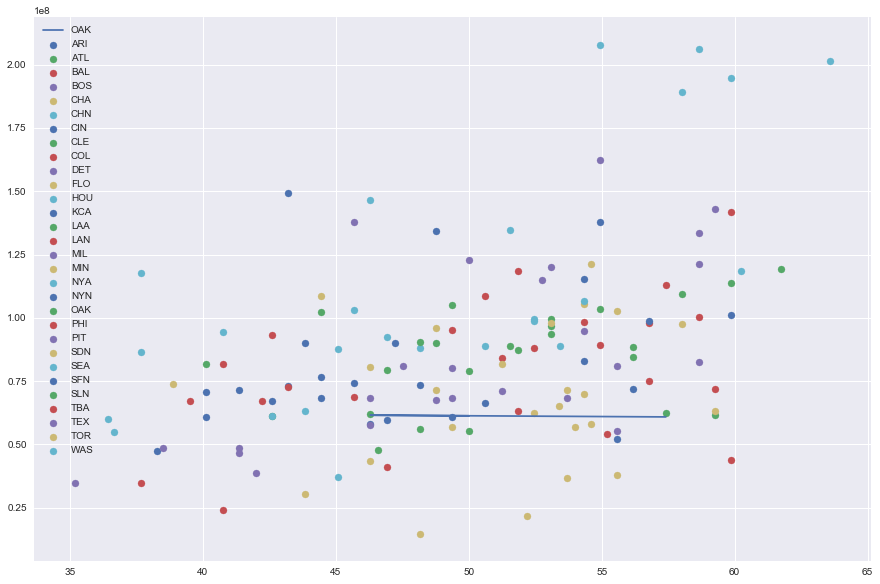

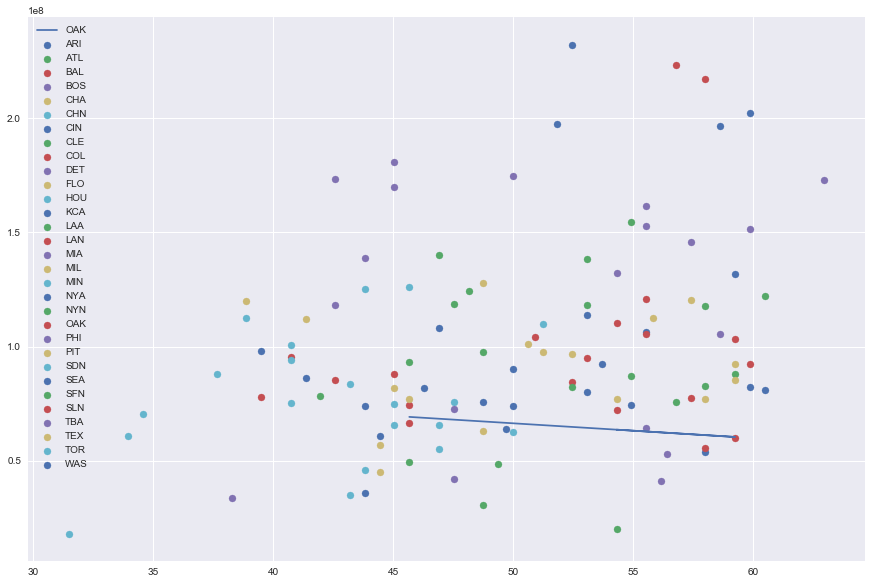

In [39]:
import numpy as np
for title1, group1 in df_1990_2014_category:
    
    fig, ax = plt.subplots(figsize=(15,10))

    for title2, group2 in group1.groupby('teamID'):
        x=group2.Winning_Percentage
        y=group2.total_payroll
        plt.scatter(x,y,label=title2 )
        if title2=="OAK":
            m, b = np.polyfit(x, group2.total_payroll, 1)

            plt.plot(x, m*x + b, '-',label=title2)

        plt.legend()
        
        
    
    
    

## Question 2

What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A's spending efficiency across these time periods (labeling points in the scatterplot can help interpretation).

### From the above graphs we can see the Oakland regression line. In the second period they pay for the wins. In the third period they don't pay extra for wining. In years (2000 to 2005) they paid less and they won better. In the last two periods also they payroll remain constant or have negative slope. From these graphs it's difficult to compare the performance of different teams.

## Part 3: Data transformations

Standardizing across years

It looks like comparing payrolls across years is problematic so let's do a transformation that will help with these comparisons.

## Problem 5

Create a new variable in your dataset that standardizes payroll conditioned on year. So, this column for team i in year j should equal:

standarized_payroll ij = (payroll ij - average_payroll j)/standard_deviation_payroll j

### Here I added the standardize_payroll column based on the above formula.

In [35]:
average_payroll_over_time=team_year_win_salary.groupby('yearID')['total_payroll'].mean()
sd_payroll_over_time=team_year_win_salary.groupby('yearID')['total_payroll'].std()


df_1990_2014['standardize_payroll']=(df_1990_2014['total_payroll'] - df_1990_2014['yearID'].map(lambda x: average_payroll_over_time[average_payroll_over_time.index==x].values[0] ))/df_1990_2014['yearID'].map(lambda x: sd_payroll_over_time[sd_payroll_over_time.index==x].values[0])
df_1990_2014.head()

C:\Users\Elham\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,yearID,teamID,franchID,Rank,G,Ghome,W,L,Winning_Percentage,total_payroll,categories,standardize_payroll
130,1990,ATL,ATL,6,162,81.0,65,97,40.123457,14555501.0,"(1984, 1990]",-0.667275
131,1990,BAL,BAL,5,161,80.0,76,85,47.204969,9680084.0,"(1984, 1990]",-1.959861
132,1990,BOS,BOS,1,162,81.0,88,74,54.320988,20558333.0,"(1984, 1990]",0.924213
133,1990,CAL,ANA,4,162,81.0,80,82,49.382716,21720000.0,"(1984, 1990]",1.232198
134,1990,CHA,CHW,2,162,80.0,94,68,58.024691,9491500.0,"(1984, 1990]",-2.009859


## Problem 6

Repeat the same plots as Problem 4, but use this new standardized payroll variable.


### Here we draw the same plot as problem 4 with this new standardized payroll.

C:\Users\Elham\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


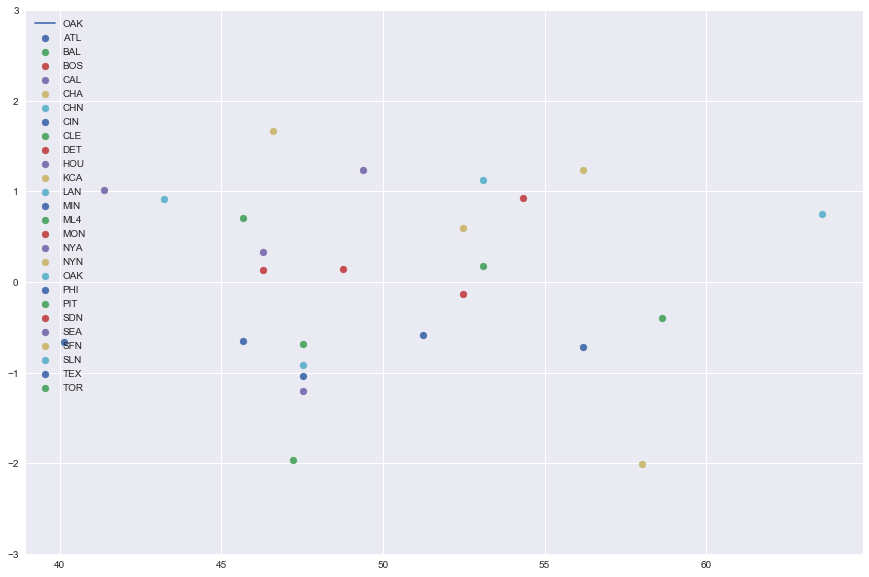

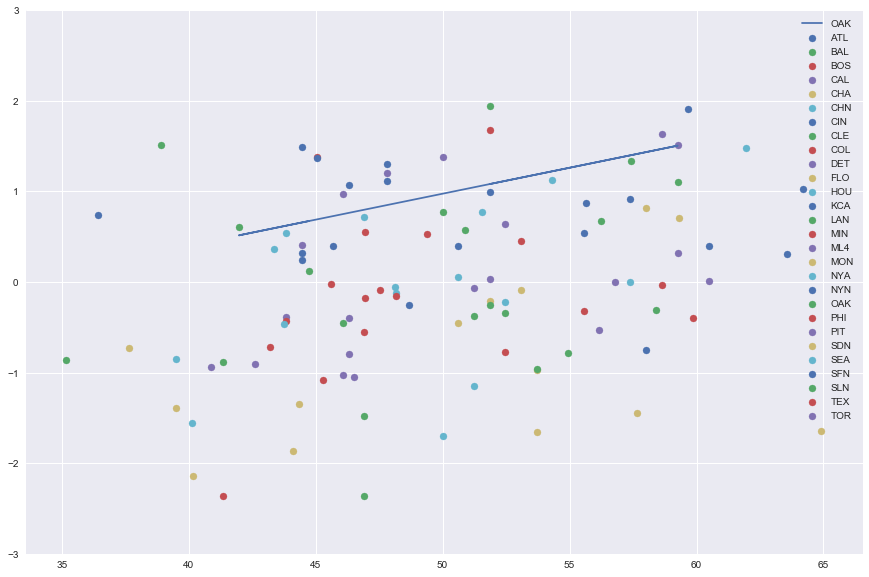

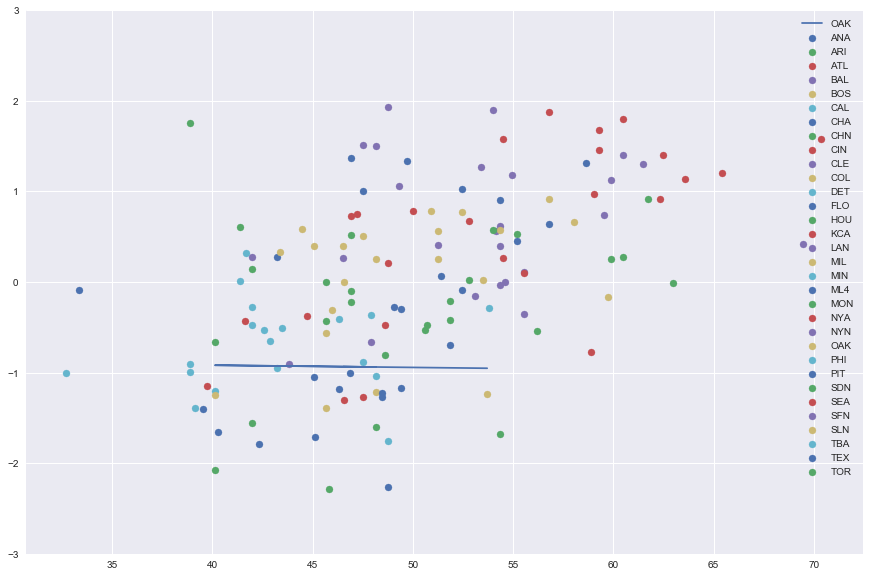

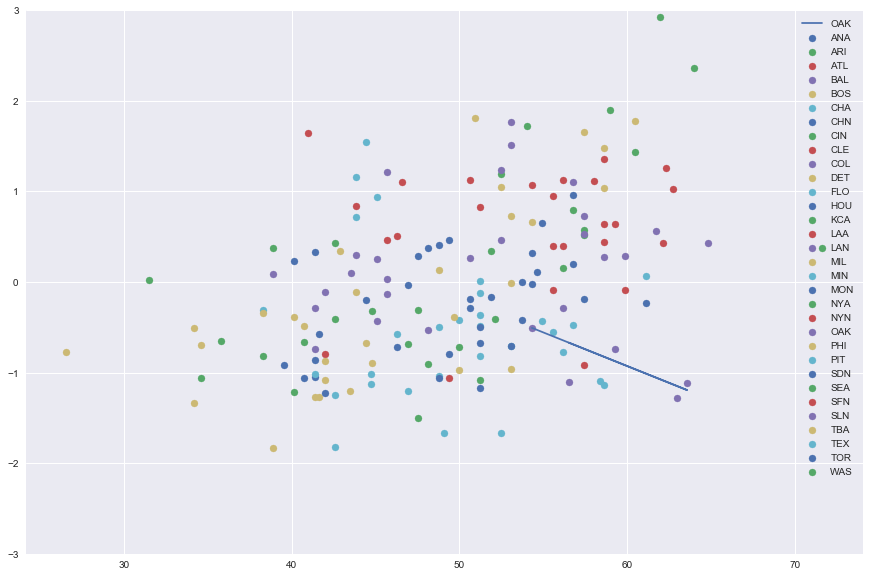

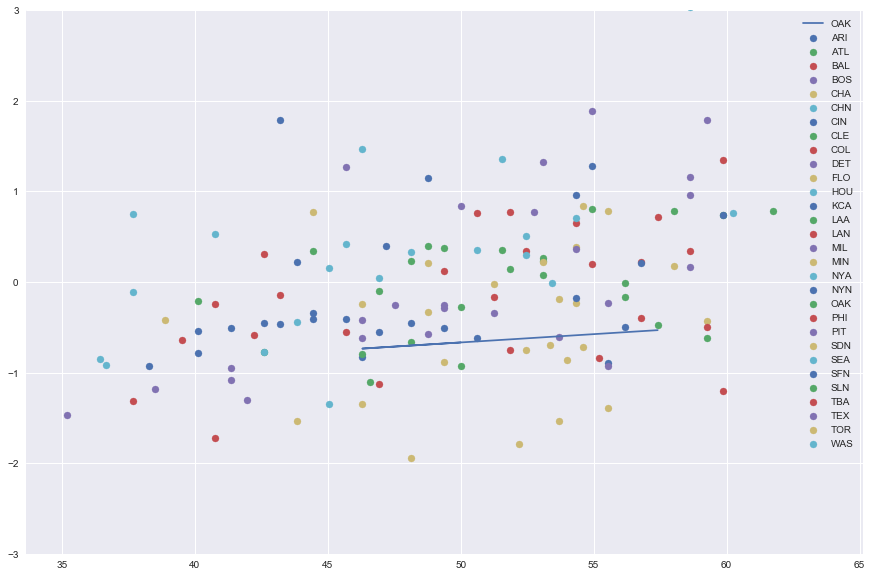

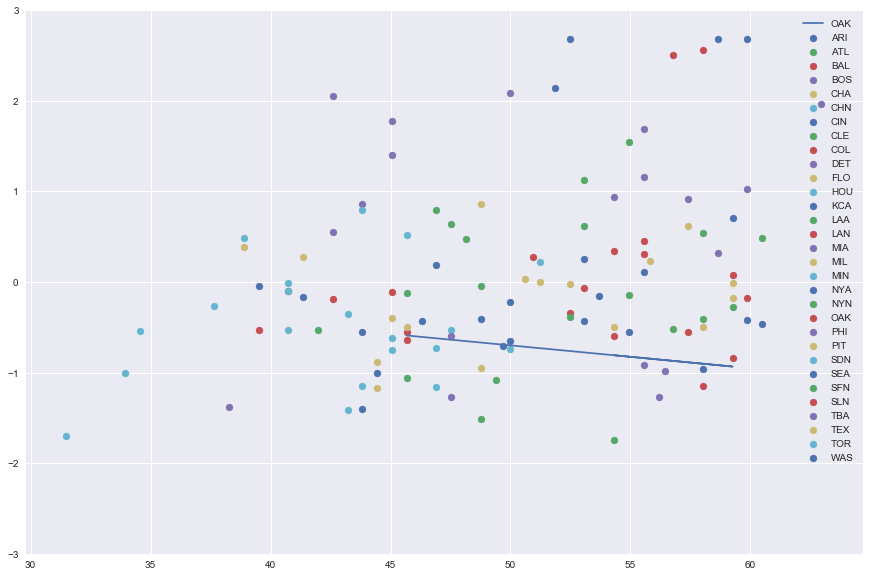

In [37]:
import numpy as np
for title1, group1 in df_1990_2014.groupby('categories'):
    
    fig, ax = plt.subplots(figsize=(15,10))

    for title2, group2 in group1.groupby('teamID'):
        x=group2.Winning_Percentage
        y=group2.standardize_payroll
        plt.scatter(x,y,label=title2 )
        if title2=="OAK":
            m, b = np.polyfit(x, y, 1)

            plt.plot(x, m*x + b, '-',label=title2)

        plt.legend()
        plt.ylim(-3,3)

## Question 3

Discuss how the plots from Problem 4 and Problem 6 reflect the transformation you did on the payroll variable.

### From the above graphs it can be seen that Oakland paid less than average of other teams after 2000 and their results were good. These graphs that use standardized payroll are better than part4 graphs because they show how the Oakland is performing comparing with average of other teams' payrolls. However it's still difficult to compare different teams efficiency.

## Expected wins

It's hard to see global trends across time periods using these multiple plots, but now that we have standardized payrolls across time, we can look at a single plot showing correlation between winning percentage and payroll across time.

## Problem 7

Make a single scatter plot of winning percentage (y-axis) vs. standardized payroll (x-axis). Add a regression line to highlight the relationship.
regression line:   expected_win_pct ij = 50 + 2.5 * standardized_payroll ij

### Here a scatter plot is used to show the winning percentage on y-axis versus standardized payrol on x-axis. Also a regression line is fitted on the data.

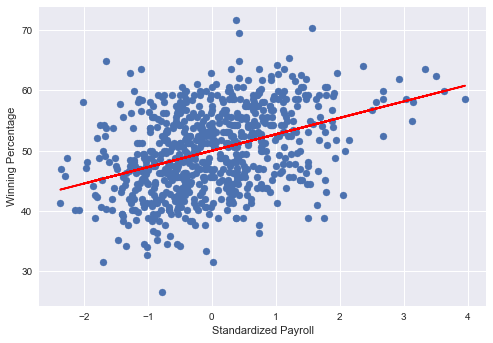

In [42]:
x=df_1990_2014['standardize_payroll']
y=df_1990_2014['Winning_Percentage']
plt.scatter(x,y )
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '-',c='r')
plt.xlabel("Standardized Payroll")
plt.ylabel("Winning Percentage")

## Spending efficiency

Using this result, we can now create a single plot that makes it easier to compare teams efficiency. The idea is to create a new measurement unit for each team based on their winning percentage and their expected winning percentage that we can plot across time summarizing how efficient each team is in their spending.

Problem 8

Create a new field to compute each team's spending effiency, given by

efficiency ij = win_pct ij - expected_win_pct ij


### Here I added efficiency to the dataframe.

In [43]:
df_1990_2014['efficiency']=df_1990_2014['Winning_Percentage']-(50+2.5*df_1990_2014['standardize_payroll'])
df_1990_2014.head()

C:\Users\Elham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,yearID,teamID,franchID,Rank,G,Ghome,W,L,Winning_Percentage,total_payroll,categories,standardize_payroll,efficiency
130,1990,ATL,ATL,6,162,81.0,65,97,40.123457,14555501.0,"(1984, 1990]",-0.667275,-8.208354
131,1990,BAL,BAL,5,161,80.0,76,85,47.204969,9680084.0,"(1984, 1990]",-1.959861,2.104621
132,1990,BOS,BOS,1,162,81.0,88,74,54.320988,20558333.0,"(1984, 1990]",0.924213,2.010454
133,1990,CAL,ANA,4,162,81.0,80,82,49.382716,21720000.0,"(1984, 1990]",1.232198,-3.697779
134,1990,CHA,CHW,2,162,80.0,94,68,58.024691,9491500.0,"(1984, 1990]",-2.009859,13.049338


Make a line plot with year on the x-axis and efficiency on the y-axis. A good set of teams to plot are Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay (teamIDs OAK, BOS, NYA, ATL, TBA).

### Here I plotted the efficiency versus year for the mentioned teams.

(1985, 2016)

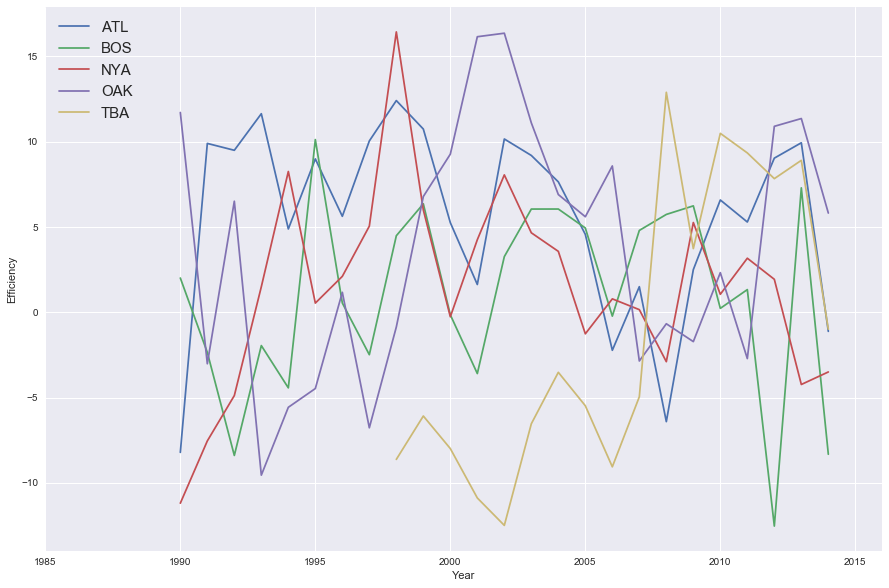

In [207]:
fig, ax = plt.subplots(figsize=(15,10))
for title, group in df_1990_2014.groupby('teamID'):
    if title in ('OAK', 'BOS', 'NYA', 'ATL', 'TBA'):
        group.plot(x='yearID', y='efficiency', ax=ax, label=title)

plt.legend(loc=2, prop={'size': 15})
plt.xlabel('Year')
plt.ylabel('Efficiency')
plt.xlim(1985,2016)


## Question 4

What can you learn from this plot compared to the set of plots you looked at in Question 2 and 3? How good was Oakland's efficiency during the Moneyball period?

### This graph show the performance of the teams much better than the graphs we had so far. By looking at Oakland's efficiency we can see that it was higher than other teams during 2000 to 2005 so Oakland was performing very well during that period. 